In [8]:
from scipy.stats import binom
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# globe example
data = ["W","L","W","W","W","L","W","L","W"]
print(len(data))

9


example 2.2: testing the python equivalent of R's `dbinom` function

In [10]:
n = len(data) # total number tosses
p = 0.5 # probability of W, just provided by example
k = 6 # number of Ws
print(binom.pmf(k,n,p))

0.16406250000000006


example 2.3: grid approximation

In [7]:
param_grid = np.linspace(0,1,20)

# define a flat prior
prior = np.array([1]*20)
# prior = np.exp(-5*abs(param_grid - 0.5))


# compute likelihood at each value on grid
liks = binom.pmf(k,n,p=param_grid)

# get unstandardized posterior
un_post = liks* prior

# normalize posterior to sum to 1
posterior = un_post / sum(un_post)

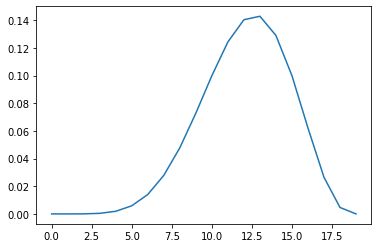

In [9]:
print("posterior distribution from globe example")
plt.plot(posterior)

example XXX: quadratic approximation

AKA laplace approximation

first simply try finding the mode using minimize function in scipy.  This corresponds to R's `optim`, which is what McElreath's `rethinking::map` function uses under the hood.

then try using PyMC3 using a custom class contained in the `pythinking` library being built in this repo.

In [11]:
# first try simply finding the mode using minimize function in scipy

# univariate example for laplace approx.
# return negative log_posterior because maximize, not minimize.
def model(x,k,n):
    liks = binom.logpmf(k,n,x)
    log_post = liks + np.log(1)       
    return -log_post

# use minimize to get just the MAP estimate using the hardcoded model
map_estimate = minimize(model,
                        x0 = 0.5,
                        args = (6,9),
                        method="Nelder-Mead")

It finds the right solution, but in this simple implementation using the Nelder Mead solver, it doesn't return the Hessian that can be used to build the posterior distribution.

In [15]:
print(map_estimate)

 final_simplex: (array([[0.66669922],
       [0.66660156]]), array([1.29781074, 1.2978108 ]))
           fun: 1.2978107372683727
       message: 'Optimization terminated successfully.'
          nfev: 26
           nit: 13
        status: 0
       success: True
             x: array([0.66669922])
